# Importing Numpy, Pandas, Matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Inpunt Parameters

In [22]:
class Ideal_engine:
    '''
    k  = specific heat ratio
    PR = Compressor Pressure ratio (only integer numbers)
    T1 = Ambient temperature (kelvin)
    T3 = Turbine inlet temperature (kelvin)
    P1 = Ambient pressure (Pascal)
    cp = Specific heat at constant pressure (J/kg*k)
    R  = Specific gas constant (J/Kg*k) 
    '''
    pr = np.linspace(1,50,50)

    def __init__(self,k,PR,T1,T3,P1,cp,R=287):

        self.T3 = T3
        self.T1 = T1
        self.P1 = P1
        self.cp = cp
        self.PR = PR
        self.R  = R
    def calculation(self):
        self.k  = self.cp/(self.cp-self.R)
        self.T2 = self.T1*self.pr**((self.k-1)/self.k)
        self.P2 = self.P1*self.pr
        self.W2 = self.cp*(self.T2-self.T1)
        self.T4 = self.T3*(self.P1/self.P2)**((self.k-1)/self.k)
        self.W3 = self.cp*(self.T3-self.T4)
        self.WT = self.W3-self.W2
        self.Q  = self.cp*(self.T3-self.T2)
        self.ef = self.WT/self.Q*100
        #--------------------------------------------------------------------------------------
        self.t2 = (self.T1*(self.PR)**((self.k-1)/self.k))
        self.p2 = self.P1*self.PR
        self.t4 = self.T3*(self.P1/self.p2)**((self.k-1)/self.k)
        self.v1 = (self.R*self.T1)/self.P1
        self.v2 = (self.R*self.t2)/self.p2
        self.v3 = (self.R*self.T3)/self.p2
        self.v4 = (self.R*self.t4)/self.P1


    def data(self):
        data=pd.DataFrame({'Pressure Ratio':self.pr,"P2 (Pa)":self.P2,"T2 (K)":self.T2,"T3 (K)":self.T3,"Net Power (MW)":self.WT/1000000,"Thermal Efficiency":self.ef})
        self.power=data[data['Pressure Ratio']==self.PR]['Net Power (MW)']
        self.efficiency=data[data['Pressure Ratio']==self.PR]['Thermal Efficiency']
        return data

    
    def graphs(self):
        
        # NET POWER AND EFFICIENCY
        fig, axes = plt.subplots(2,2,figsize=(15,20))
        #--------------------------------------------------------------------------------------
        x= self.pr
        y_pow= self.WT/1000000
        y_ef=self.ef
        # NET POWER ---------------------------------------------------------------------------
        axes[0,0].plot(x,y_pow,color='k')
        axes[0,0].plot(self.PR,self.power,marker='o')
        axes[0,0].set_xlabel('Pressure Ratio')
        axes[0,0].set_ylabel("Net Power (MW)")
        axes[0,0].grid(True)
        # EFFICIENCY PLOT ---------------------------------------------------------------------
        axes[1,0].plot(x,y_ef,color='k')
        axes[1,0].plot(self.PR,self.efficiency,marker='o')
        axes[1,0].set_xlabel('Pressure Ratio')
        axes[1,0].set_ylabel('Thermal Efficiency')
        axes[1,0].grid(True)
        
        # T-S DIAGRAM--------------------------------------------------------------------------
        self.ds=self.cp*np.log(self.T3/self.t2)
        x12 = np.array([0,0])
        p12 = np.array([self.T1,self.t2])
        x23 = np.linspace(0,self.ds,20)
        p23 = self.t2*np.exp(x23/self.cp)
        x34 = np.array([self.ds,self.ds])
        p34 = np.array([self.T3,self.t4])
        x41 = np.linspace(0,self.ds,20)
        p41 = self.T1*np.exp(x41/self.cp)

        axes[0,1].plot(x12,p12,color='b')
        axes[0,1].plot(x23,p23,color='b')
        axes[0,1].plot(x34,p34,color='b')
        axes[0,1].plot(x41,p41,color='b')
        axes[0,1].set_xlabel('Entropy Change')
        axes[0,1].set_ylabel("Temperature (k)")
        axes[0,1].grid(True)
        
        # ISOBARIC LINES ----------------------------------------------------------------------
        
        cp_line1 = self.T1*np.exp(x23/self.cp)
        cp_line2 = (self.T1+(self.t2-self.T1)/3)*np.exp(x23/self.cp)
        cp_line3 = (self.T1+2*(self.t2-self.T1)/3)*np.exp(x23/self.cp)
        cp_line4 = self.t2*np.exp(x23/self.cp)
        cp_line5 = (self.t2+2*(self.t2-self.T1)/3)*np.exp(x23/self.cp)
        cp_line6 = 2*self.t2*np.exp(x23/self.cp)
        
        axes[0,1].plot(x23,cp_line1,marker='_',color='k',alpha=0.5)
        axes[0,1].plot(x23,cp_line2,marker='_',color='k',alpha=0.5)
        axes[0,1].plot(x23,cp_line3,marker='_',color='k',alpha=0.5)
        axes[0,1].plot(x23,cp_line4,marker='_',color='k',alpha=0.5)
        axes[0,1].plot(x23,cp_line5,marker='_',color='k',alpha=0.5)
        axes[0,1].plot(x23,cp_line6,marker='_',color='k',alpha=0.5)
        
        # P-v DIAGRAM -------------------------------------------------------------------------
        
        x_12=np.linspace(self.v1,self.v2,20)
        pv12=(self.P1/(self.v1)**(-self.k))*x_12**(-self.k)
        x_23=np.array([self.v2,self.v3])
        pv23=np.array([self.p2,self.p2])
        x_34=np.linspace(self.v3,self.v4,20)
        pv34=(self.p2/(self.v3)**(-self.k))*x_34**(-self.k)
        x_41=np.array([self.v1,self.v4])
        pv41=np.array([self.P1,self.P1])
        
        axes[1,1].plot(x_12,pv12,color='b')
        axes[1,1].plot(x_23,pv23,color='b')
        axes[1,1].plot(x_34,pv34,color='b')
        axes[1,1].plot(x_41,pv41,color='b')
        axes[1,1].grid(True)

        # ISOTHERMAL LINES ----------------------------------------------------------------------        
        
        xt=np.linspace(self.v2,self.v4,20)
        ct_lines1 = (self.R*self.T1)/xt
        ct_lines2 = (self.R*self.t2)/xt
        ct_lines3 = (self.R*self.T3)/xt        
        ct_lines4 = (self.R*self.t4)/xt
        
        axes[1,1].plot(xt,ct_lines1,color='k',alpha=0.5)
        axes[1,1].plot(xt,ct_lines2,color='k',alpha=0.5)
        axes[1,1].plot(xt,ct_lines3,color='k',alpha=0.5)
        axes[1,1].set_ylim(0,self.p2*1.15)
        axes[1,1].set_xlabel('Specific Volume (m^3/Kg)')
        axes[1,1].set_ylabel('Pressure (Pa)')
        axes[1,1].grid(True)

        return axes
    
    def summary(self):
        
        data2=pd.DataFrame({"Stage":[1,2,3,4],"Pressure (Pa)":[self.P1,self.p2,self.p2,self.P1],"Temperature (K)":[self.T1,self.t2,self.T3,self.t4],"Density (kg/s)":[1/self.v1,1/self.v2,1/self.v3,1/self.v4]})
        data2.set_index("Stage",inplace=True)
        
        return data2


In [23]:
engine=Ideal_engine(1.4,20,298,1100,101325,1004.5)
engine.calculation()
engine.data().head()


,Pressure Ratio,P2 (Pa),T2 (K),T3 (K),Net Power (MW),Thermal Efficiency
0,1.0,101325.0,298.000000,1100,0.000000,0.000000
1,2.0,202650.0,363.266069,1100,0.132961,17.966464
2,3.0,303975.0,407.883956,1100,0.187295,26.940004
3,4.0,405300.0,442.826298,1100,0.215896,32.704990
4,5.0,506625.0,471.978243,1100,0.232540,36.861496


AttributeError: 'Ideal_engine' object has no attribute 'power'

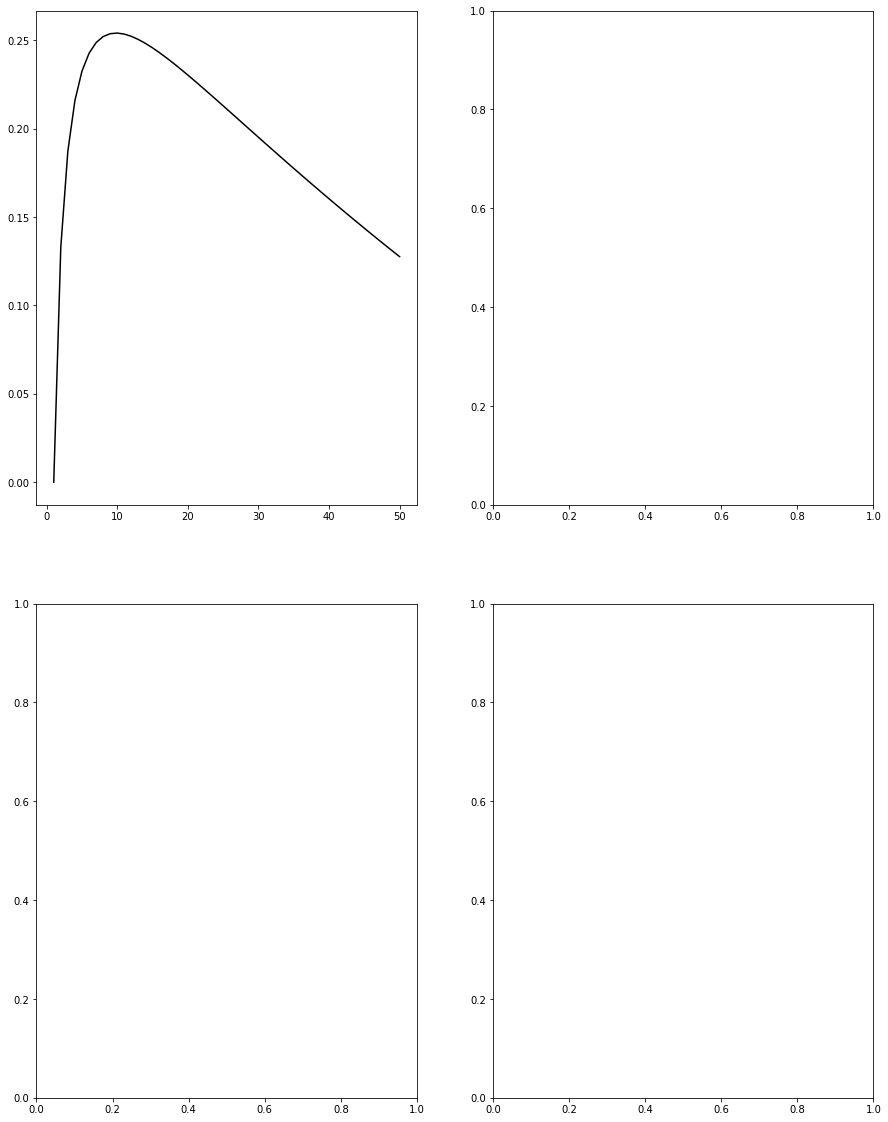

In [24]:
engine.graphs()

In [16]:
engine.summary()

,Pressure (Pa),Temperature (K),Density (kg/s)
Stage,,,
1,101325,298.000000,1.184727
2,2026500,701.356974,10.067592
3,2026500,1100.000000,6.419069
4,101325,467.379683,0.755379
